In [3]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
from scipy.stats import ttest_ind

In [6]:
nba = pd.read_csv('top_ten_nba.csv')
nba.head()

,Unnamed: 0,season,teamAbbr,star_power,assists/score,win_count,w/l_ratio
0,15,2012,MIA,2.016983,0.223727,66.0,0.804878
1,20,2012,OKC,2.068063,0.201693,60.0,0.731707
2,25,2012,SA,1.693733,0.243450,58.0,0.707317
3,7,2012,DEN,1.641121,0.229910,57.0,0.695122
4,12,2012,LAC,1.697413,0.235103,56.0,0.682927


In [7]:
ncaa = pd.read_csv('top_ten_ncaa.csv')
ncaa.head()

,Unnamed: 0,season,team_alias,game_id,team_game_score,assists/score,differencestrash,w/l_ratio,star_power,differences,win_count
0,87,2013,FLA,1160.000000,69.923077,0.184149,-1.641026,0.923077,1.987436,-14.466667,36
1,330,2013,WICH,874.057143,74.657143,0.183337,13.800000,0.971429,1.979143,-17.000000,34
2,11,2013,ARIZ,1012.447368,72.868421,0.205605,5.815789,0.868421,1.689211,-14.315789,33
3,51,2013,CONN,1065.200000,71.825000,0.168568,4.325000,0.800000,2.144500,-9.200000,32
4,145,2013,LOU,1074.405405,81.027027,0.189206,15.555556,0.837838,1.941622,-18.478261,31


In [8]:
#calculate total averages
scatter_nba = pd.read_csv('scatter.csv')
scatter_ncaa = pd.read_csv('scatter_ncaa.csv')

star_total_nba_mean = scatter_nba['star_power'].mean()
star_total_nba_sem = scatter_nba['star_power'].sem()
star_total_ncaa_mean = scatter_ncaa['star_power'].mean()
star_total_ncaa_sem = scatter_ncaa['star_power'].sem()

assists_total_nba_mean = round(scatter_nba['assists/score'].mean(), 2)
assists_total_nba_sem = scatter_nba['assists/score'].sem()
assists_total_ncaa_mean = round(scatter_ncaa['assists/score'].mean(), 2)
assists_total_ncaa_sem = scatter_ncaa['assists/score'].sem()
print(assists_total_nba_mean)

0.22


In [11]:
#calculate top nba
star_nba_mean = nba['star_power'].mean()
star_nba_sem = nba['star_power'].sem()
assists_nba_mean = round(nba['assists/score'].mean(),2)
assists_nba_sem = nba['assists/score'].sem()

In [12]:
#calculate top ncaa
star_ncaa_mean = ncaa['star_power'].mean()
star_ncaa_sem = ncaa['star_power'].sem()
assists_ncaa_mean = round(ncaa['assists/score'].mean(),2)
assists_ncaa_sem = ncaa['assists/score'].sem()

In [14]:
ttest_ind(nba['star_power'], scatter_nba['star_power'])

Ttest_indResult(statistic=2.892321266988842, pvalue=0.004178309320462397)

<IPython.core.display.Javascript object>


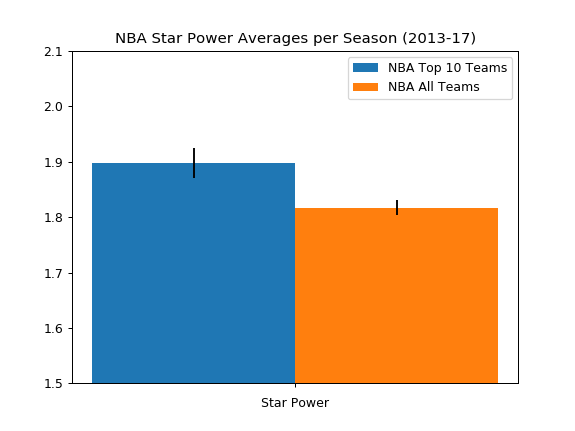

In [193]:
fig, ax = plt.subplots()

ind = np.arange(1)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, (star_nba_mean), width, yerr=(star_nba_sem))
p2 = ax.bar(ind + width, (star_total_nba_mean), width, yerr=(star_total_nba_sem))

ax.set_title('NBA Star Power Averages per Season (2013-17)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels('')
ax.set_xlabel('Star Power')
ax.set_ylim(1.5,2.1)

ax.legend((p1[0], p2[0]), ('NBA Top 10 Teams', 'NBA All Teams'))
ax.autoscale_view()

plt.savefig('nba_star_bar.png')
fig.show()

In [15]:
ttest_ind(nba['assists/score'], scatter_nba['assists/score'])

Ttest_indResult(statistic=0.2465407744824872, pvalue=0.8054761549220031)

<IPython.core.display.Javascript object>


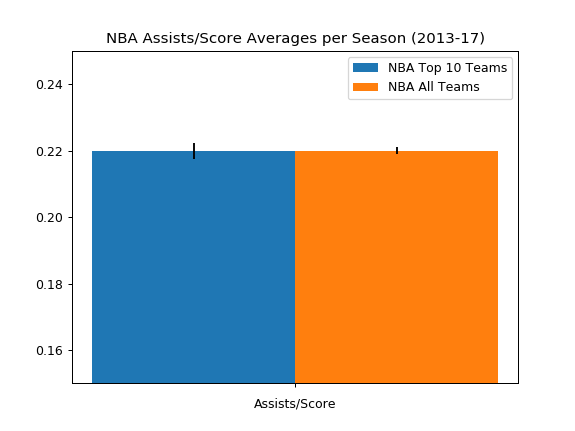

In [194]:
fig, ax = plt.subplots()

ind = np.arange(1)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, assists_nba_mean, width, yerr=(assists_nba_sem))
p2 = ax.bar(ind + width, (assists_total_nba_mean), width, yerr=(assists_total_nba_sem))

ax.set_title('NBA Assists/Score Averages per Season (2013-17)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels('')
ax.set_xlabel('Assists/Score')
ax.set_ylim(.15,.25)

ax.legend((p1[0], p2[0]), ('NBA Top 10 Teams', 'NBA All Teams'))
ax.autoscale_view()

plt.savefig('nba_assists_bar.png')
fig.show()

<IPython.core.display.Javascript object>


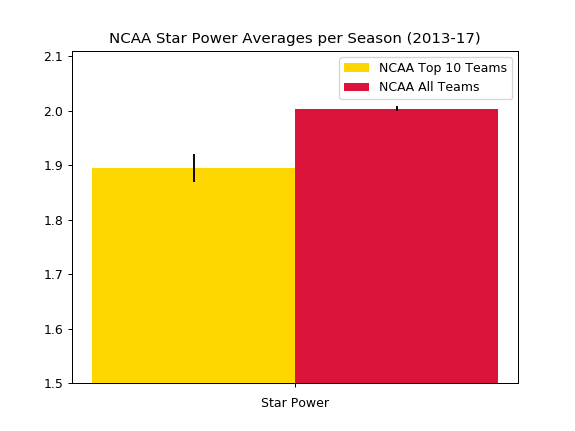

In [195]:
fig, ax = plt.subplots()

ind = np.arange(1)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, (star_ncaa_mean), width, yerr=(star_ncaa_sem), color = 'gold')
p2 = ax.bar(ind + width, (star_total_ncaa_mean), width, yerr=(star_total_ncaa_sem), color = 'crimson')

ax.set_title('NCAA Star Power Averages per Season (2013-17)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels('')
ax.set_xlabel('Star Power')
ax.set_ylim(1.5)

ax.legend((p1[0], p2[0]), ('NCAA Top 10 Teams', 'NCAA All Teams'))
ax.autoscale_view()

plt.savefig('ncaa_star_bar.png')
fig.show()

<IPython.core.display.Javascript object>


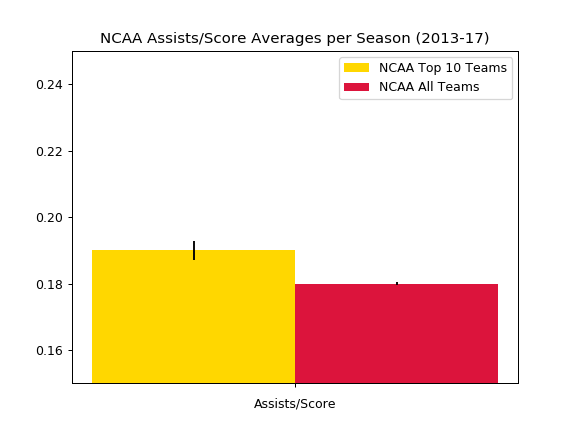

In [196]:
fig, ax = plt.subplots()

ind = np.arange(1)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, (assists_ncaa_mean), width, yerr=(assists_ncaa_sem), color = 'gold')
p2 = ax.bar(ind + width, (assists_total_ncaa_mean), width, yerr=(assists_total_ncaa_sem), color = 'crimson')

ax.set_title('NCAA Assists/Score Averages per Season (2013-17)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels('')
ax.set_xlabel('Assists/Score')
ax.set_ylim(.15,.25)

ax.legend((p1[0], p2[0]), ('NCAA Top 10 Teams', 'NCAA All Teams'))
ax.autoscale_view()

plt.savefig('ncaa_assists_bar.png')
fig.show()

# Top 10 percent

In [16]:
nba_pct = pd.read_csv('top_ten_pct_nba.csv')
ncaa_pct = pd.read_csv('top_ten_pct_ncaa.csv')
nba_pct.head()

,Unnamed: 0,season,teamAbbr,star_power,assists/score,win_count,w/l_ratio
0,15,2012,MIA,2.016983,0.223727,66.0,0.804878
1,20,2012,OKC,2.068063,0.201693,60.0,0.731707
2,25,2012,SA,1.693733,0.243450,58.0,0.707317
3,55,2013,SA,1.653307,0.237808,62.0,0.756098
4,50,2013,OKC,2.421223,0.205716,59.0,0.719512


In [17]:
#calculate top nba
star_nba_mean = nba_pct['star_power'].mean()
star_nba_sem = nba_pct['star_power'].sem()
assists_nba_mean = round(nba_pct['assists/score'].mean(),2)
assists_nba_sem = nba_pct['assists/score'].sem()

In [18]:
#calculate top ncaa
star_ncaa_mean = ncaa['star_power'].mean()
star_ncaa_sem = ncaa['star_power'].sem()
assists_ncaa_mean = round(ncaa['assists/score'].mean(),2)
assists_ncaa_sem = ncaa['assists/score'].sem()

In [19]:
ttest_ind(nba_pct['star_power'], scatter_nba['star_power'])

Ttest_indResult(statistic=3.6753321657690323, pvalue=0.00030656834852560037)

<IPython.core.display.Javascript object>


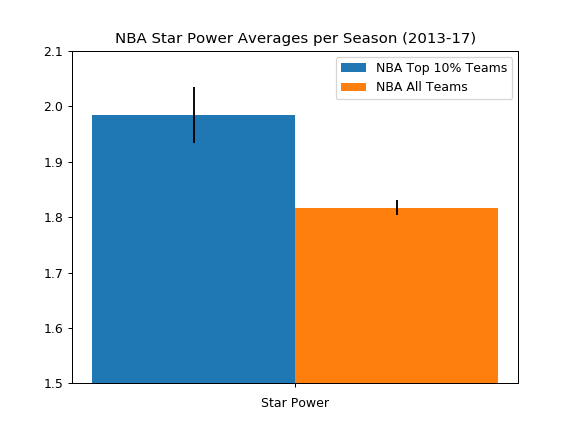

In [184]:
fig, ax = plt.subplots()

ind = np.arange(1)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, (star_nba_mean), width, yerr=(star_nba_sem))
p2 = ax.bar(ind + width, (star_total_nba_mean), width, yerr=(star_total_nba_sem))

ax.set_title('NBA Star Power Averages per Season (2013-17)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels('')
ax.set_xlabel('Star Power')
ax.set_ylim(1.5,2.1)

ax.legend((p1[0], p2[0]), ('NBA Top 10% Teams', 'NBA All Teams'))
ax.autoscale_view()

plt.savefig('nba_star_bar_pct.png')
fig.show()

In [20]:
ttest_ind(nba_pct['assists/score'], scatter_nba['assists/score'])

Ttest_indResult(statistic=2.736662935662679, pvalue=0.006777103440637841)

<IPython.core.display.Javascript object>


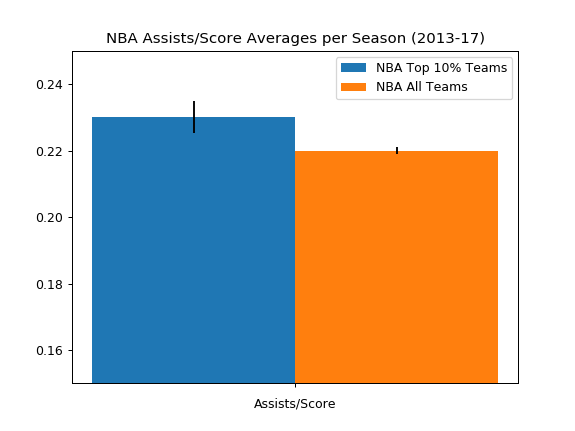

In [185]:
fig, ax = plt.subplots()

ind = np.arange(1)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, assists_nba_mean, width, yerr=(assists_nba_sem))
p2 = ax.bar(ind + width, (assists_total_nba_mean), width, yerr=(assists_total_nba_sem))

ax.set_title('NBA Assists/Score Averages per Season (2013-17)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels('')
ax.set_xlabel('Assists/Score')
ax.set_ylim(.15,.25)

ax.legend((p1[0], p2[0]), ('NBA Top 10% Teams', 'NBA All Teams'))
ax.autoscale_view()

plt.savefig('nba_assists_bar_pct.png')
fig.show()

In [21]:
ttest_ind(ncaa_pct['star_power'], scatter_ncaa['star_power'])

Ttest_indResult(statistic=-4.724927081879902, pvalue=2.5077492161516837e-06)

<IPython.core.display.Javascript object>


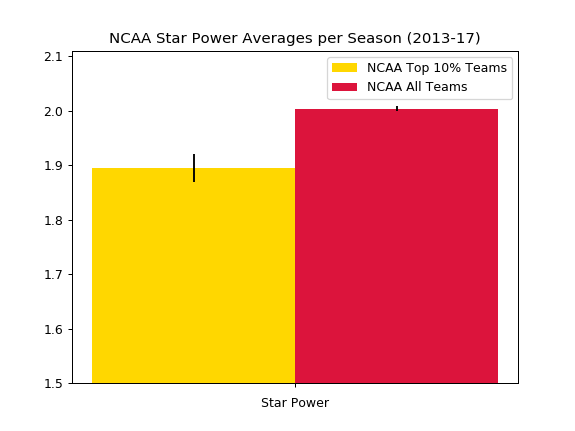

In [186]:
fig, ax = plt.subplots()

ind = np.arange(1)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, (star_ncaa_mean), width, yerr=(star_ncaa_sem), color = 'gold')
p2 = ax.bar(ind + width, (star_total_ncaa_mean), width, yerr=(star_total_ncaa_sem), color = 'crimson')

ax.set_title('NCAA Star Power Averages per Season (2013-17)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels('')
ax.set_xlabel('Star Power')
ax.set_ylim(1.5)

ax.legend((p1[0], p2[0]), ('NCAA Top 10% Teams', 'NCAA All Teams'))
ax.autoscale_view()

plt.savefig('ncaa_star_bar_pct.png')
fig.show()

In [22]:
ttest_ind(ncaa_pct['assists/score'], scatter_ncaa['assists/score'])

Ttest_indResult(statistic=5.460137957386765, pvalue=5.5228440371479975e-08)

<IPython.core.display.Javascript object>


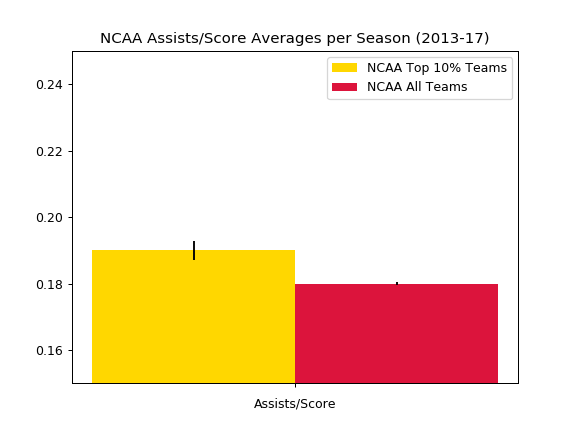

In [187]:
fig, ax = plt.subplots()

ind = np.arange(1)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, (assists_ncaa_mean), width, yerr=(assists_ncaa_sem), color = 'gold')
p2 = ax.bar(ind + width, (assists_total_ncaa_mean), width, yerr=(assists_total_ncaa_sem), color = 'crimson')

ax.set_title('NCAA Assists/Score Averages per Season (2013-17)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels('')
ax.set_xlabel('Assists/Score')
ax.set_ylim(.15,.25)

ax.legend((p1[0], p2[0]), ('NCAA Top 10% Teams', 'NCAA All Teams'))
ax.autoscale_view()

plt.savefig('ncaa_assists_bar_pct.png')
fig.show()